In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!pip3 install easyocr

In [3]:
import easyocr

In [4]:
import cv2

In [5]:
from matplotlib import pyplot as plt
import numpy as np

In [22]:
IMG_PATH = 'photo-inside-text.jpg'

In [23]:
reader = easyocr.Reader(['en'] , gpu = False)
result = reader.readtext(IMG_PATH)
result


Using CPU. Note: This module is much faster with a GPU.


[([[0, 38], [689, 38], [689, 291], [0, 291]], 'HAWAII', 0.9809137648357561)]

In [31]:
top_left = tuple(result[0][0][0])
bottom_left = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

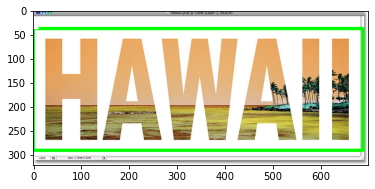

In [32]:
img = cv2.imread(IMG_PATH)
img = cv2.rectangle(img , top_left, bottom_left, (0,255,0),5)
img = cv2.putText(img,text,top_left,font, .10, (255,255,255),2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

# opening an image 

In [34]:
import cv2
from matplotlib import pyplot as plt
image_file = "page_01.jpeg"
img= cv2.imread(image_file)

In [65]:
def display(im_path):
    
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    
    # what size does the figure need to be in inches to fit the image ?
    
    figsize = width / float(dpi) , height / float(dpi)
    
    # create a figure of the right size with one axes that takes the full figure
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    #hide spines, ticks, etc.
    
    ax.axis('off')
    
    #Display the image.
    
    ax.imshow(im_data, cmap='gray')
    
    plt.show()

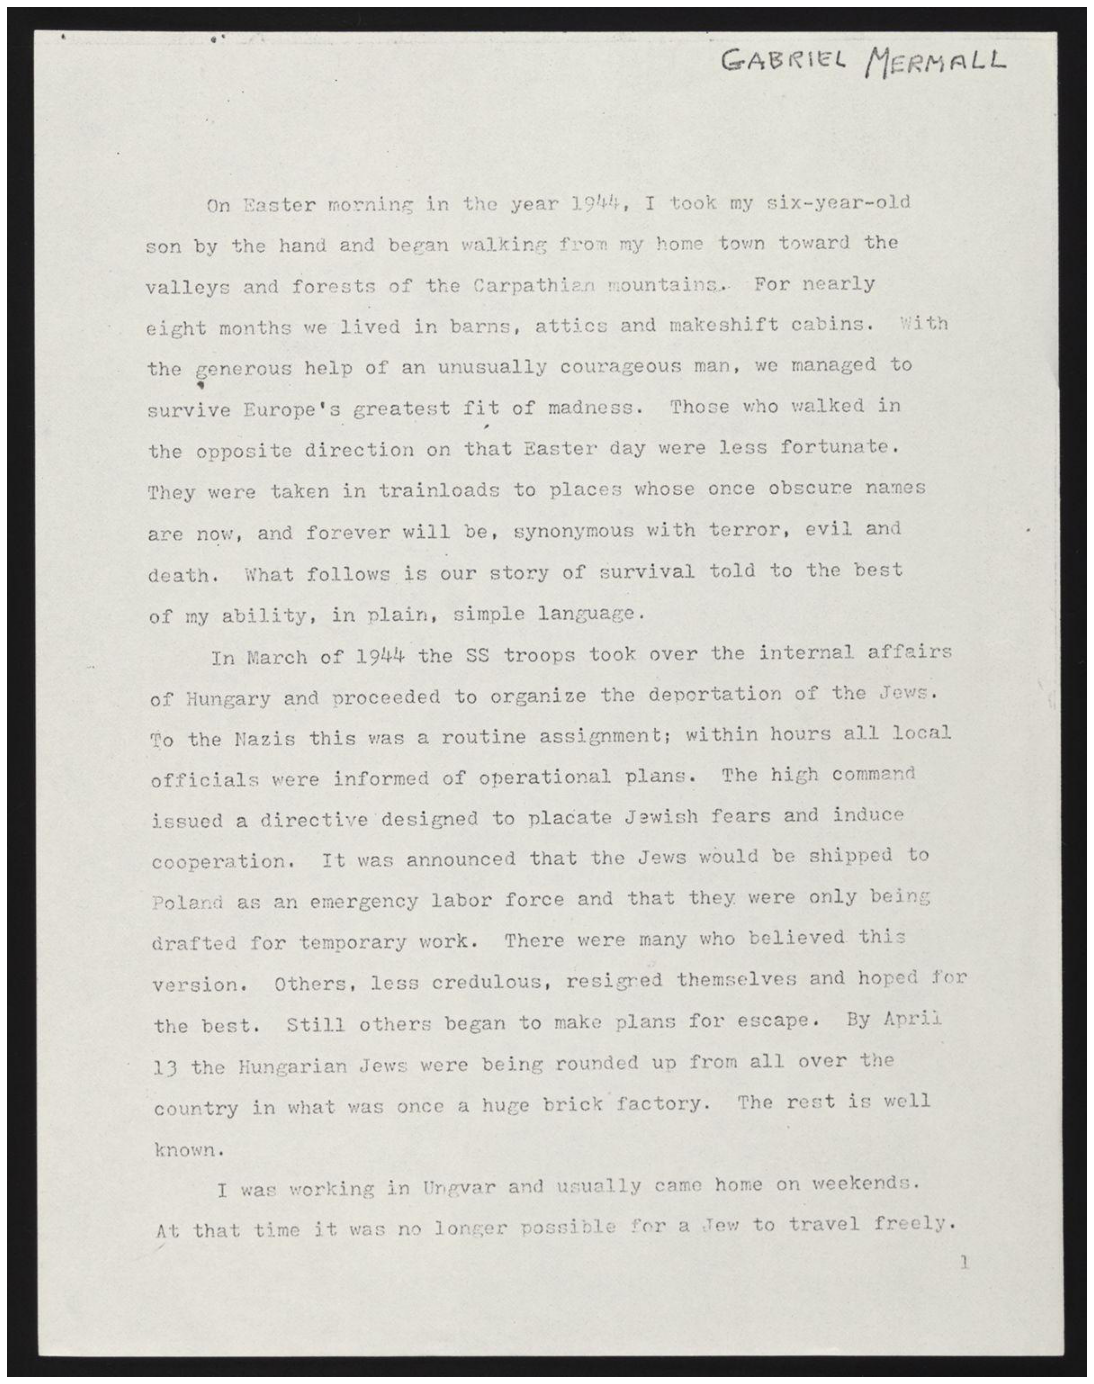

In [66]:
display(image_file)

# Inverted Image

In [67]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("pictures/inverted.jpg" , inverted_image)

True

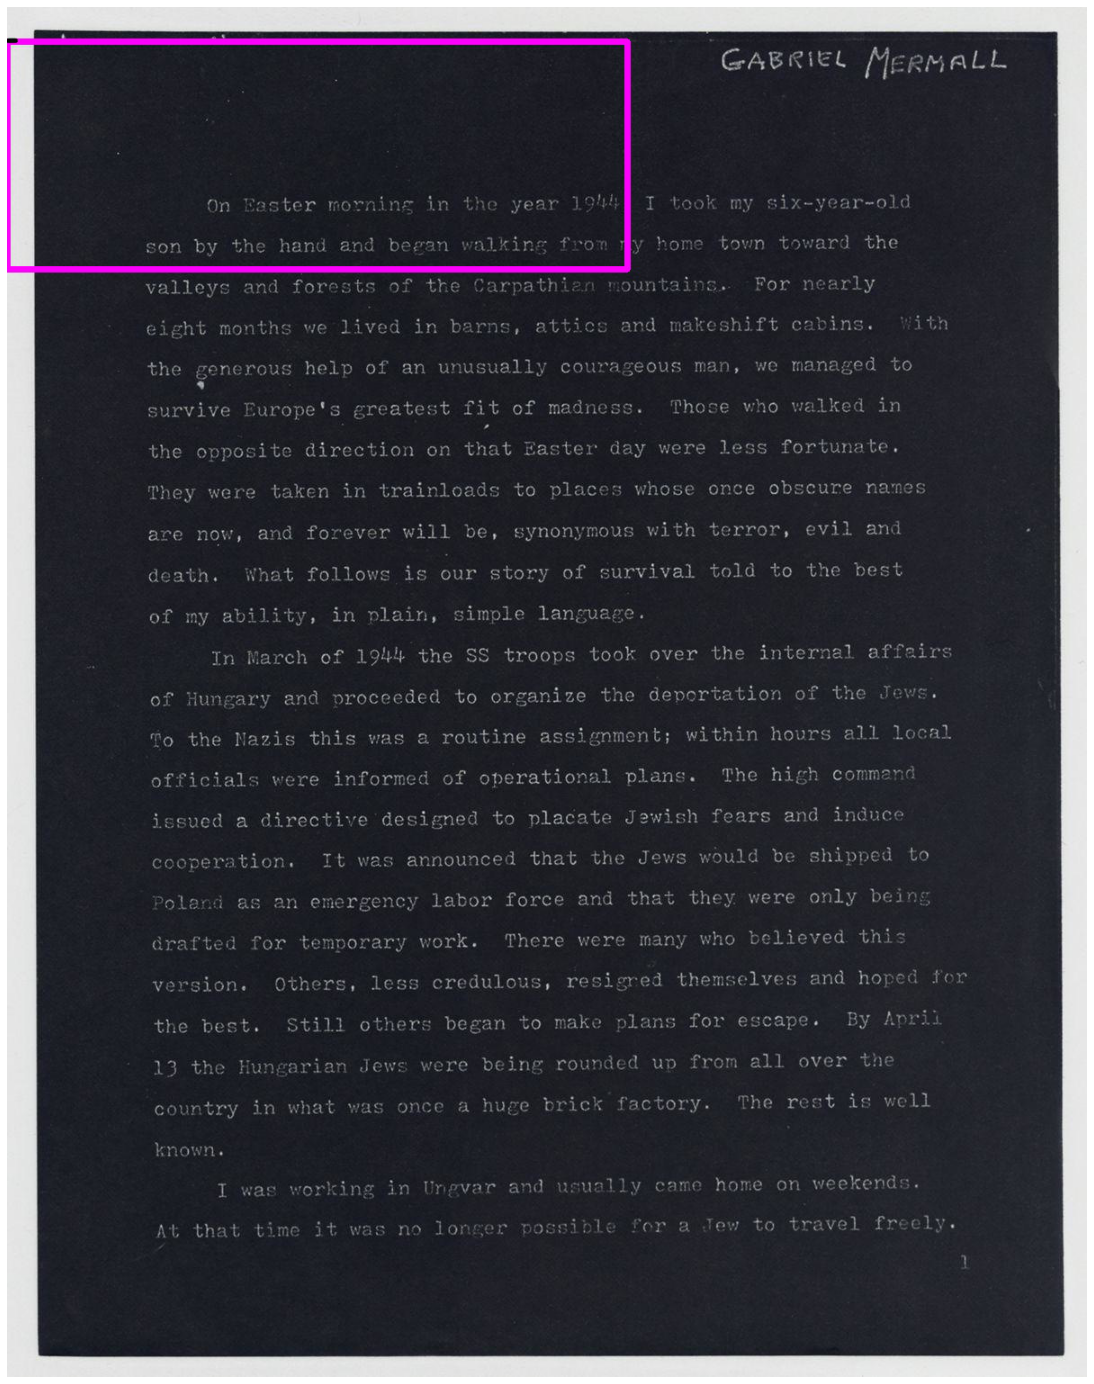

In [68]:
display("pictures/inverted.jpg")

# Binarize Image 

In [69]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [70]:
gray_image = grayscale(img)
cv2.imwrite("pictures/gray.jpg" , gray_image)

True

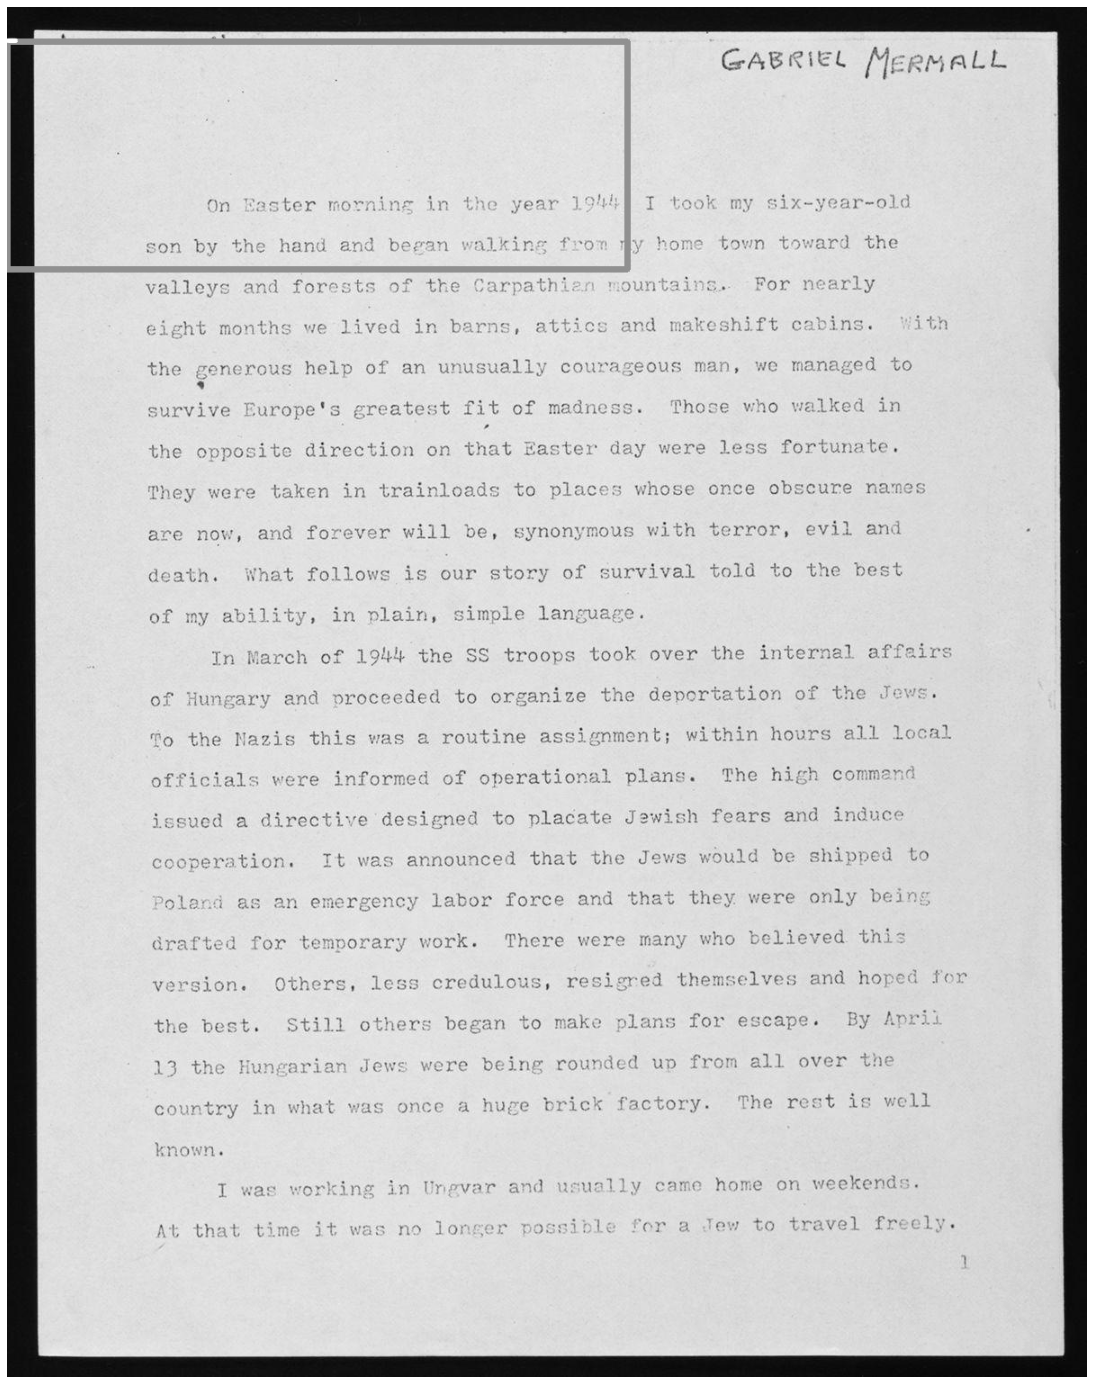

In [71]:
display("pictures/gray.jpg")

In [74]:
thresh , im_bw = cv2.threshold(gray_image , 200 , 230 ,cv2.THRESH_BINARY)
cv2.imwrite("pictures/bw_img.jpg",im_bw)

True

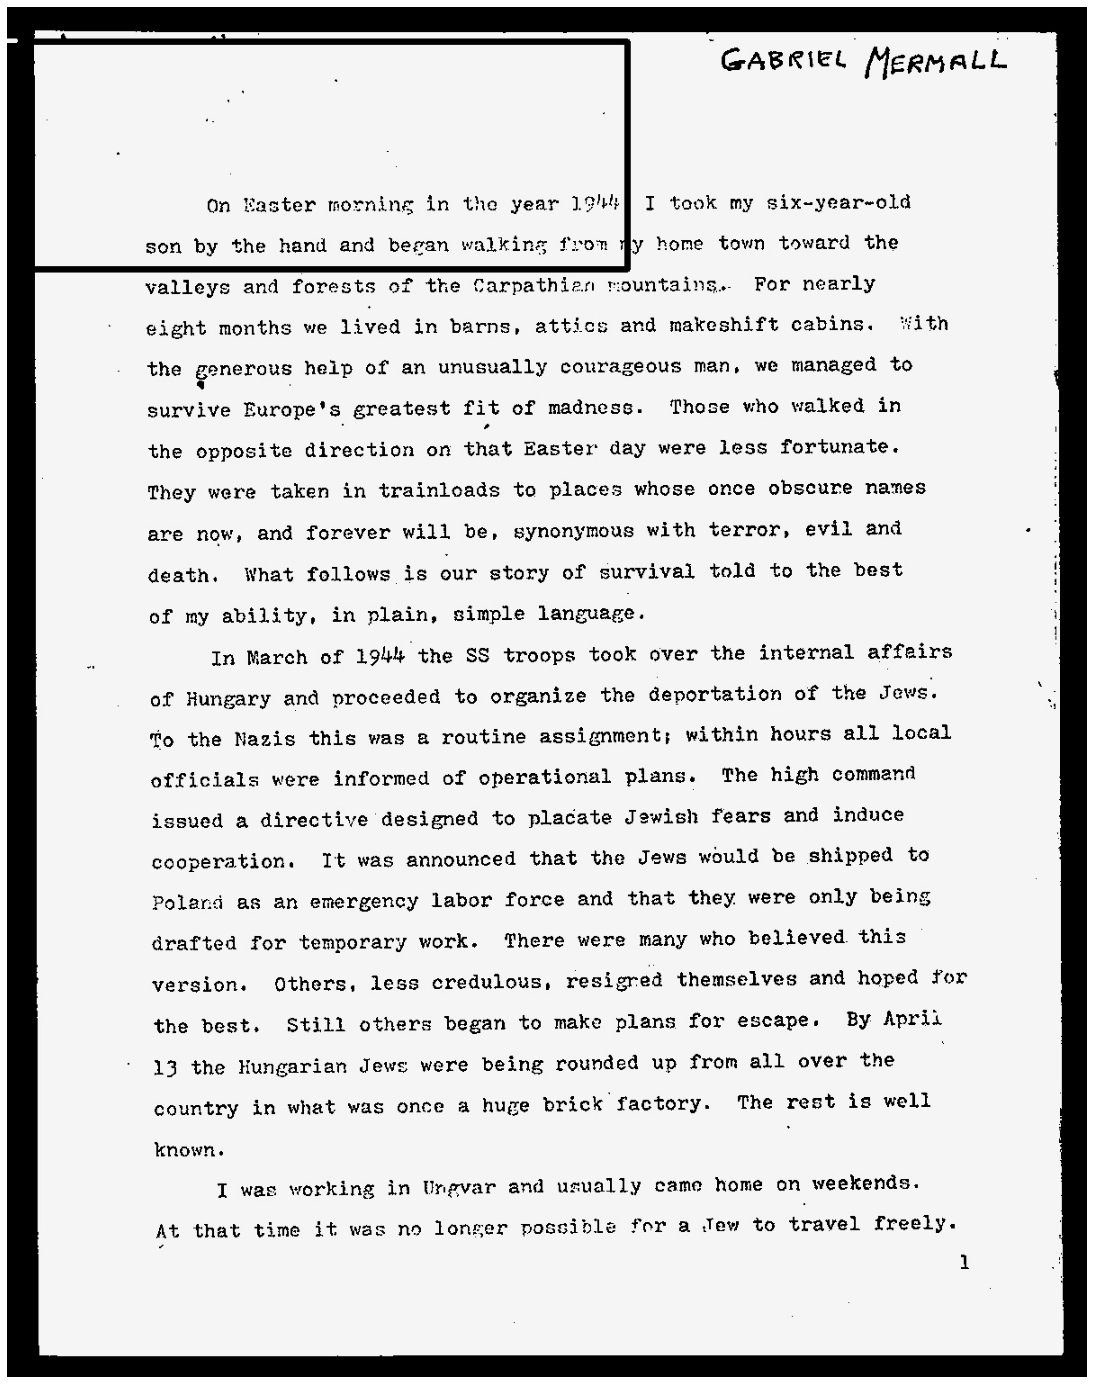

In [75]:
display("pictures/bw_img.jpg")


# Noise removal

In [76]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [77]:
no_noise = noise_removal(im_bw)
cv2.imwrite("pictures/no_noise.jpg", no_noise)

True

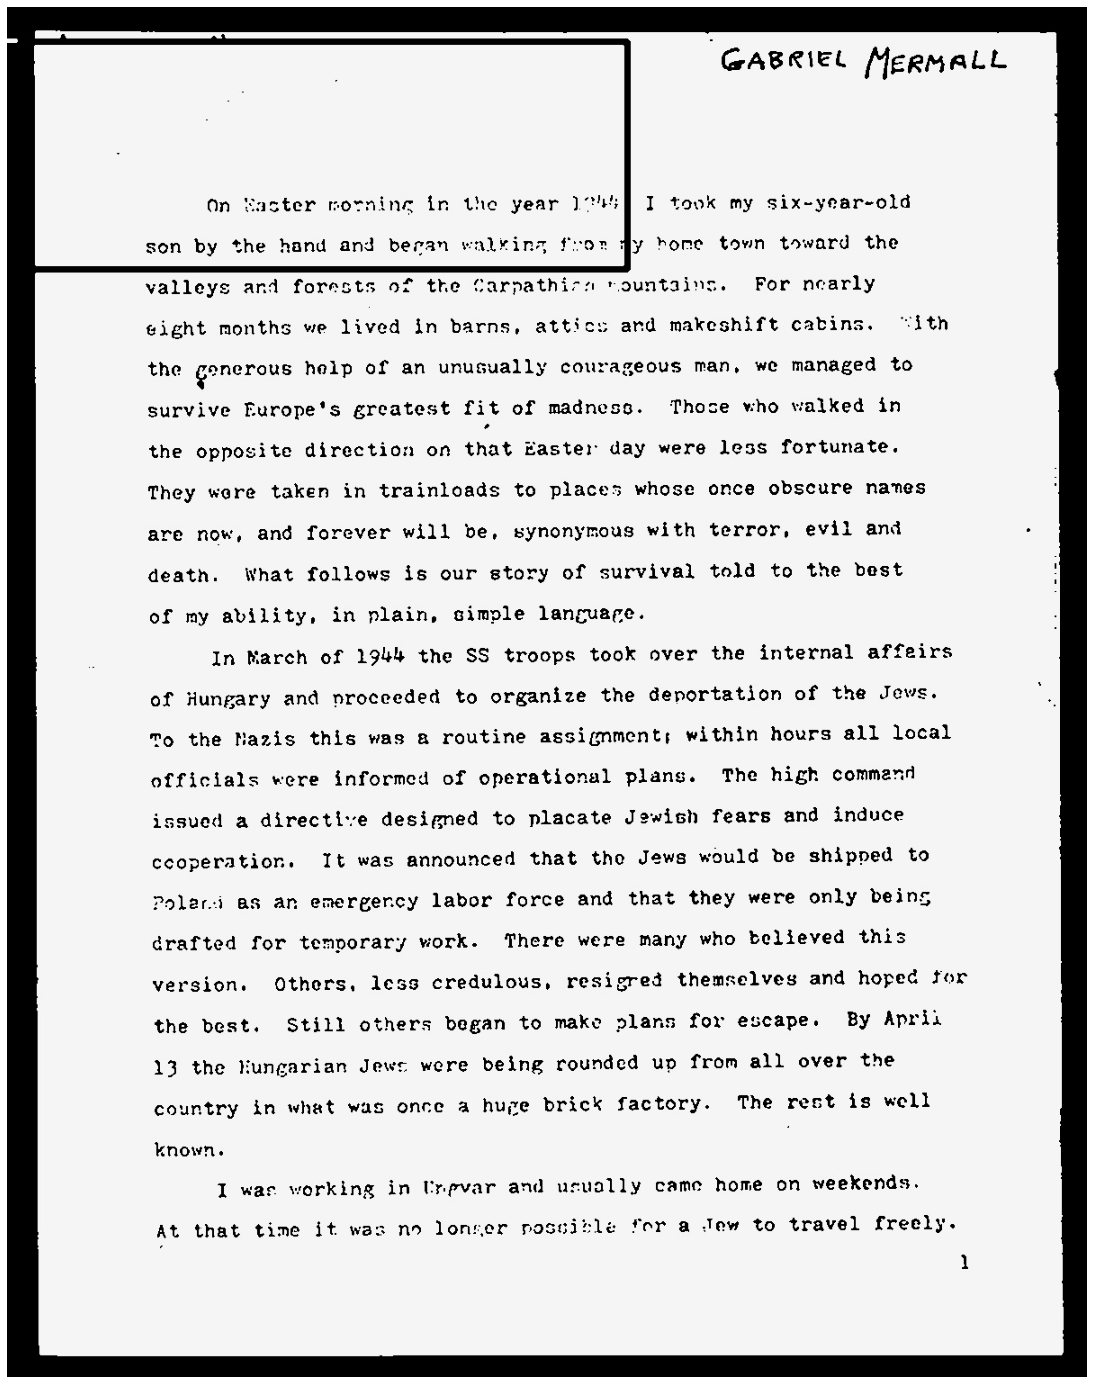

In [78]:

display("pictures/no_noise.jpg")

# Dilation and erosion

In [79]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [80]:
eroded_image = thin_font(no_noise)
cv2.imwrite("pictures/eroded_image.jpg", eroded_image)


True

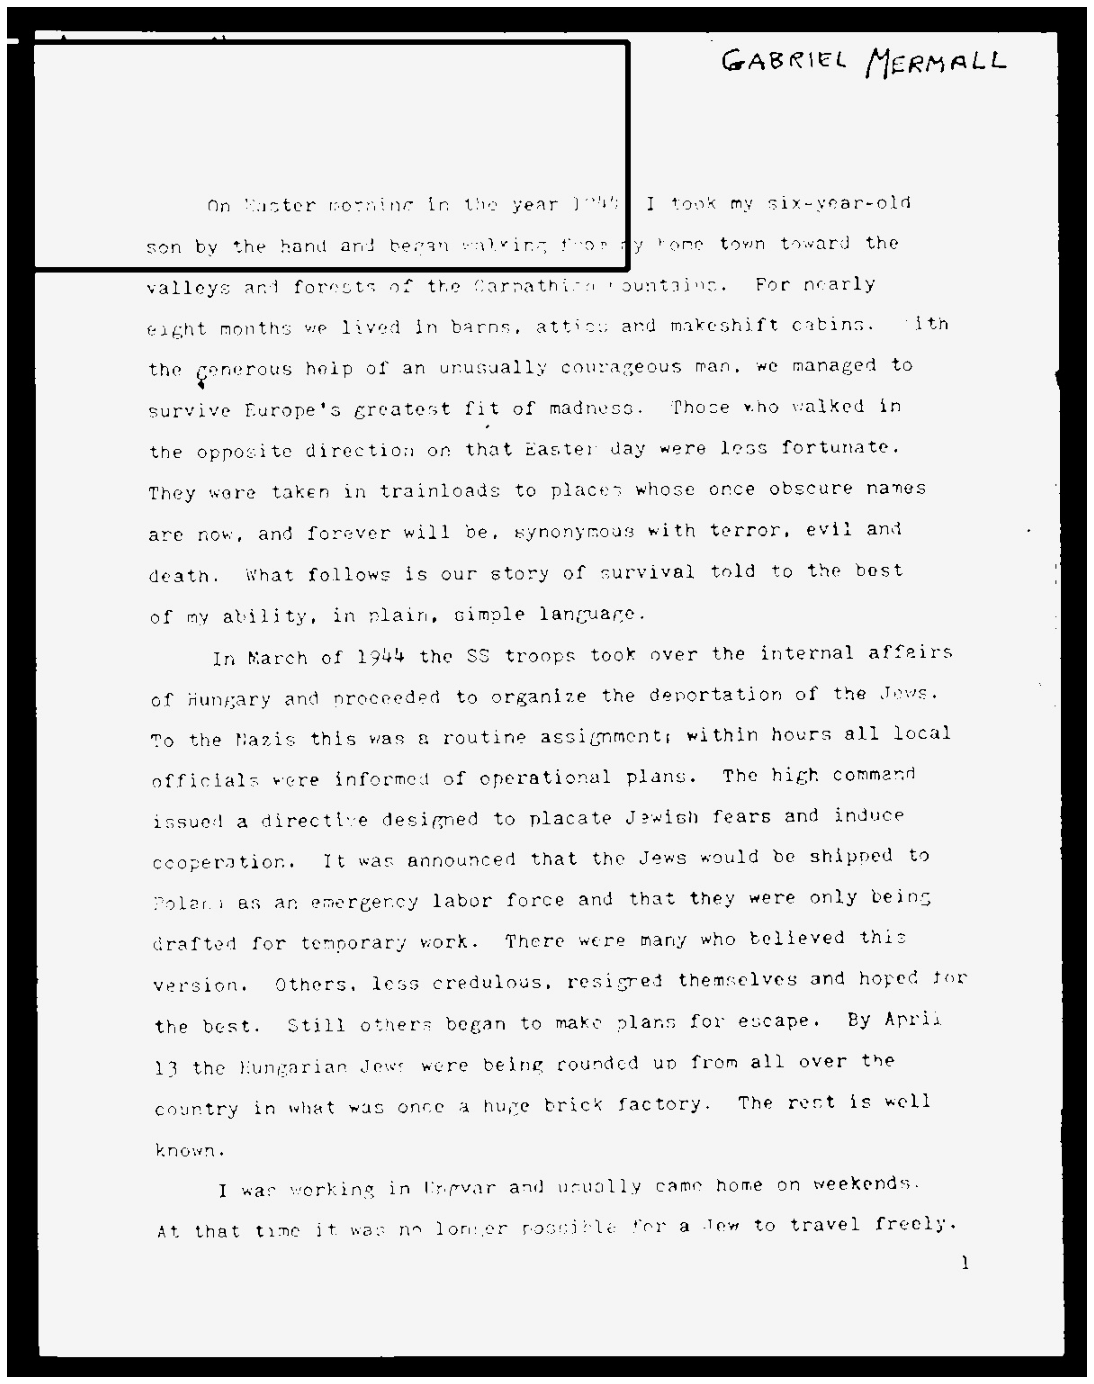

In [82]:

display("pictures/eroded_image.jpg")

In [83]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [85]:
dilated_image = thick_font(no_noise)
cv2.imwrite("pictures/dilated_image.jpg", dilated_image)

True

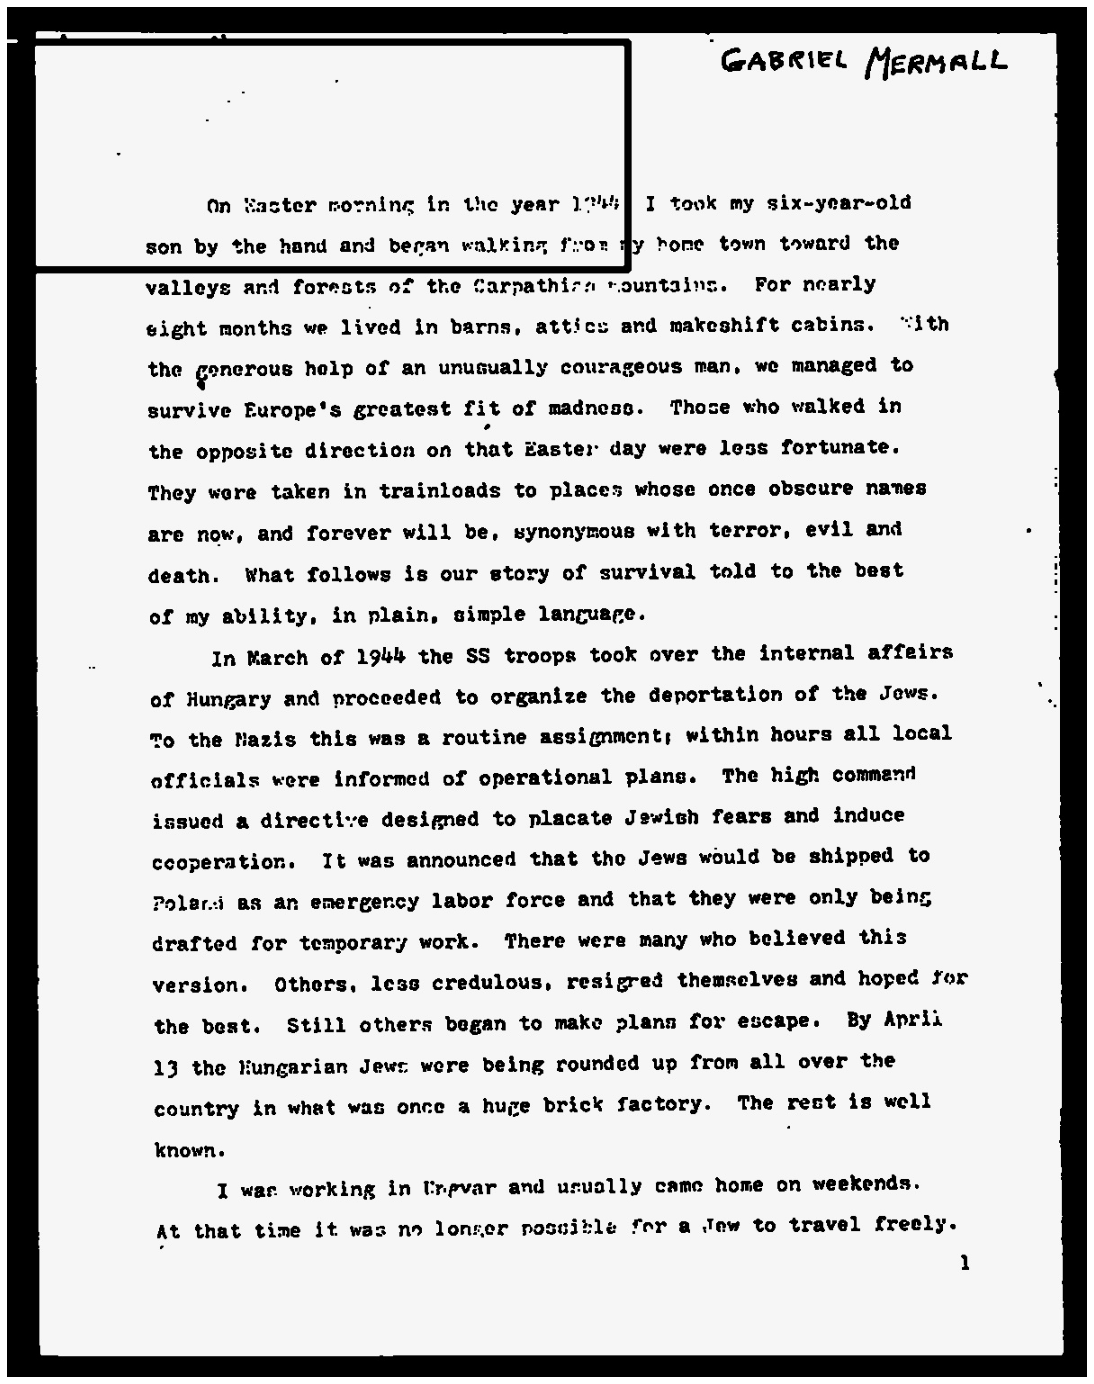

In [86]:

display("pictures/dilated_image.jpg")